In [ ]:
!pip install pytrends

In [3]:
##https://towardsdatascience.com/a-very-precise-fast-way-to-pull-google-trends-data-automatically-4c3c431960aa
import pandas as pd
import pytrends
from pytrends.request import TrendReq

pytrend = TrendReq()
KEYWORDS=['AT&T','T-Mobile','Verizon+Wireless','Sprint+Corporation','CenturyLink','Frontier Communications'] 
KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
df_CODES = pd.DataFrame(KEYWORDS_CODES)
df_CODES

,mid,title,type
0,/m/08z129,AT&T,Telecommunications company
1,/m/013rs0,T-Mobile,Mobile telecommunication company
2,/m/02d532,Verizon Wireless,Telecommunications company
3,/m/077w0b,Sprint Corporation,Telecommunications company
4,/m/07sw45,CenturyLink,Telecommunications company
5,/m/0cpx5q,Frontier Communications,Telecommunications company


In [4]:
EXACT_KEYWORDS=df_CODES['mid'].to_list()
DATE_INTERVAL='2015-12-01 2017-12-31'
COUNTRY=["US","GB","DE"] #Use this link for iso country code
#https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
CATEGORY=0 # Use this link to select categories
#CATEGORY=1159 #Business Operations: 1159 
#CATEGORY=784 #Business News: 784 
#https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)

In [6]:
Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
dicti = {}
i = 1
for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
        pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
        dicti[i] = pytrend.interest_over_time()
        i+=1
df_trends = pd.concat(dicti, axis=1)
#df_trends

In [7]:
df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
df_trends.reset_index(level=0,inplace=True) #reset_index

df_trends.columns=['date','AT&T-US','VERIZON-US','TMOBILE-US','SPRINT-US','CL-US','FC-US',
                          'at&t-UK','VERIZON-UK','TMOBILE-UK','SPRINT-UK','CL-UK','FC-UK',
                          'at&t-Ge','VERIZON-Ge','TMOBILE-Ge','SPRINT-Ge','CL-Ge','FC-Ge'] #change column names
df_trends

,date,AT&T-US,VERIZON-US,TMOBILE-US,SPRINT-US,CL-US,FC-US,at&t-UK,VERIZON-UK,TMOBILE-UK,SPRINT-UK,CL-UK,FC-UK,at&t-Ge,VERIZON-Ge,TMOBILE-Ge,SPRINT-Ge,CL-Ge,FC-Ge
0,2015-12-06,83,70,72,78,88,59,45,90,65,41,27,37,33,69,30,32,46,61
1,2015-12-13,82,69,74,82,88,65,50,98,69,40,20,20,31,76,22,31,47,45
2,2015-12-20,85,80,84,91,82,57,54,100,51,46,16,34,32,67,28,24,0,64
3,2015-12-27,94,76,93,96,100,67,48,94,53,34,13,42,20,75,34,24,27,76
4,2016-01-03,86,68,73,74,100,67,50,88,62,44,16,25,26,62,32,37,36,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2017-12-03,70,63,63,66,69,71,37,31,68,31,28,47,19,30,22,10,81,45
105,2017-12-10,71,65,65,67,68,72,39,38,60,39,18,54,18,30,18,5,60,22
106,2017-12-17,79,76,71,71,70,71,52,36,50,38,16,32,25,29,13,9,42,32
107,2017-12-24,80,73,75,77,67,76,32,32,39,22,17,30,27,33,11,8,24,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


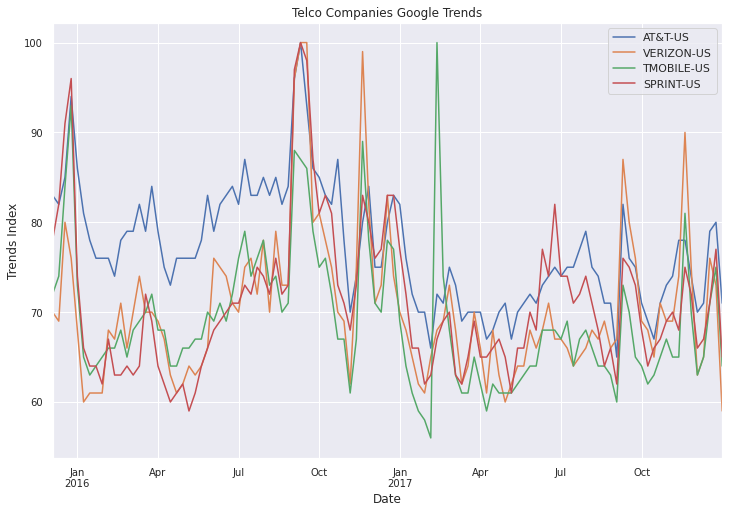

In [8]:
import seaborn as sns
sns.set(color_codes=True)
dx = df_trends.plot(figsize = (12,8),x="date", y=['AT&T-US','VERIZON-US','TMOBILE-US','SPRINT-US'], kind="line", title = "Telco Companies Google Trends")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='both', labelsize=10)

In [9]:
list(df_trends)

['date',
 'AT&T-US',
 'VERIZON-US',
 'TMOBILE-US',
 'SPRINT-US',
 'CL-US',
 'FC-US',
 'at&t-UK',
 'VERIZON-UK',
 'TMOBILE-UK',
 'SPRINT-UK',
 'CL-UK',
 'FC-UK',
 'at&t-Ge',
 'VERIZON-Ge',
 'TMOBILE-Ge',
 'SPRINT-Ge',
 'CL-Ge',
 'FC-Ge']

In [ ]:
droplst = ['H&M-US',
 'Louis Vuitton-US',
 'at&t-UK',
 'VERIZON-UK',
 'TMOBILE-UK',
 'SPRINT-UK',
 'H&M-UK',
 'Louis Vuitton-UK',
 'at&t-Ge',
 'VERIZON-Ge',
 'TMOBILE-Ge',
 'SPRINT-Ge',
 'H&M-Ge',
 'Louis Vuitton-Ge']

df_trends.drop(droplst,inplace=True,axis=1)
df_trends

,date,AT&T-US,VERIZON-US,TMOBILE-US,SPRINT-US
0,2012-01-01,24,36,65,55
1,2012-02-01,25,50,65,75
2,2012-03-01,25,50,49,55
3,2012-04-01,24,33,53,64
4,2012-05-01,22,40,54,50
...,...,...,...,...,...
91,2019-08-01,75,53,49,45
92,2019-09-01,76,62,43,33
93,2019-10-01,70,61,53,37
94,2019-11-01,66,67,45,39


In [ ]:
#https://stackoverflow.com/questions/40554396/python-summarize-daily-data-in-dataframe-to-monthly-and-quarterly

df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
#import six
#import pandas as pd
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Files/winter-cocoa-276802-380f683a2113.json"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = r'/content/drive/My Drive/Files/g_trends-telco_2012-2019-CAT_784.csv'
df_trends.to_csv(file_name, sep=',', encoding='utf-8')